In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os #collect data

path = os.listdir('/content/drive/MyDrive/Brain Tumor/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [7]:
import os
import cv2

X = []
Y = []

for cls in classes:
    pth = '/content/drive/MyDrive/Brain Tumor/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [8]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [9]:
np.unique(Y)

array([0, 1])

In [10]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [11]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

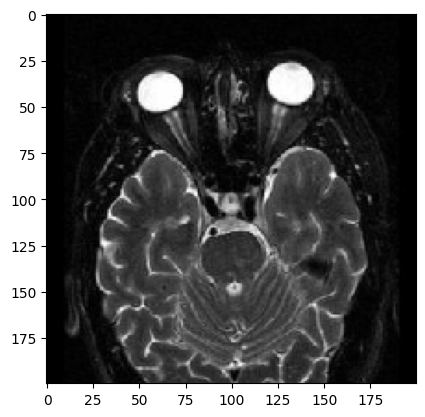

In [12]:
plt.imshow(X[0], cmap='gray')   #visualize data

In [13]:
X_updated = X.reshape(len(X), -1)        #prepare data
X_updated.shape

(1222, 40000)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)                    #split data

In [15]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [16]:
print(xtrain.max(), xtrain.min())        #feature scaling
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [17]:
from sklearn.decomposition import PCA    #feature selection:PCA

In [18]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [20]:
from sklearn.linear_model import LogisticRegression     #train model
from sklearn.svm import SVC

In [21]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [22]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [23]:
print("Training Score:", lg.score(xtrain, ytrain))     #evaluation
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9551020408163265


In [24]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9918116683725691
Testing Score: 0.9714285714285714


In [25]:
pred = sv.predict(xtest)   #prediction

In [26]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 14,  35,  42, 117, 220, 236, 241]),)

In [27]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  7
1 1


In [28]:
dec = {0:'No Tumor', 1:'Positive Tumor'}     #test  model

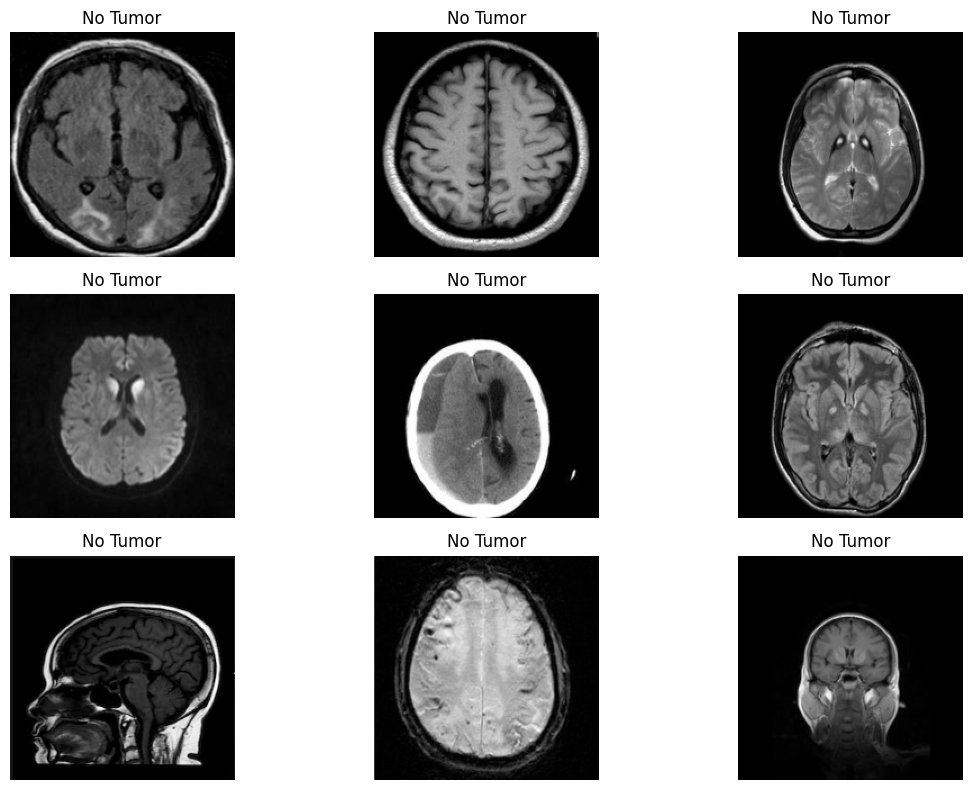

In [30]:
import cv2
import os
import matplotlib.pyplot as plt

# Assuming 'dec' is a dictionary mapping prediction labels

plt.figure(figsize=(12, 8))
image_folder = '/content/drive/MyDrive/Brain Tumor/Testing/no_tumor/'
image_files = os.listdir(image_folder)[:9]

c = 1
for i in image_files:
    img_path = os.path.join(image_folder, i)
    img = cv2.imread(img_path, 0)  # Read image in grayscale

    # Check if the image is loaded successfully
    if img is not None:
        img = cv2.resize(img, (200, 200))  # Resize the image
        img = img.reshape(1, -1) / 255  # Normalize the image data
        # Assuming 'sv' is your model for prediction
        p = sv.predict(img)

        plt.subplot(3, 3, c)
        plt.title(dec[p[0]])
        plt.imshow(img.reshape(200, 200), cmap='gray')  # Display the resized image
        plt.axis('off')
        c += 1
    else:
        print(f"Error loading image: {img_path}")

plt.tight_layout()
plt.show()

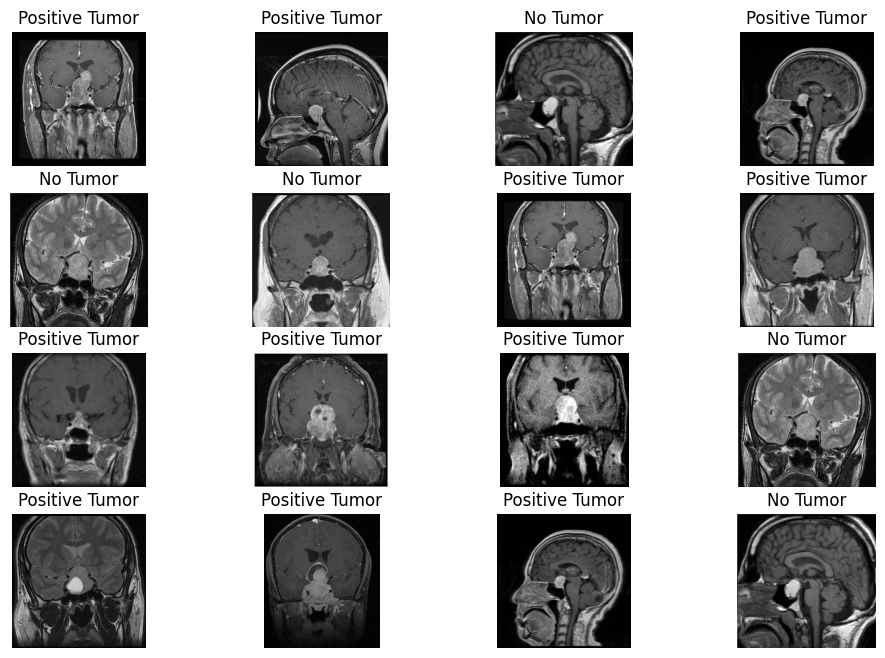

In [31]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Brain Tumor/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/Brain Tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/Brain Tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1